In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
data = pd.read_csv('bank.csv')

In [37]:
print(data.head())

   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no   2343.0     yes   no  unknown   
1   56      admin.  married  secondary      no     45.0      no   no  unknown   
2   41  technician  married  secondary      no   1270.0     yes   no  unknown   
3   55    services  married  secondary      no   2476.0     yes   no  unknown   
4   54      admin.  married   tertiary      no    184.0      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome    y  
0  5.0   may    1042.0         1   -1.0         0  unknown  yes  
1  5.0   may    1467.0         1   -1.0         0  unknown  yes  
2  5.0   may    1389.0         1   -1.0         0  unknown  yes  
3  5.0   may     579.0         1   -1.0         0  unknown  yes  
4  5.0   may     673.0         2   -1.0         0  unknown  yes  


In [38]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10861 entries, 0 to 10860
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        10861 non-null  int64  
 1   job        10846 non-null  object 
 2   marital    10861 non-null  object 
 3   education  10852 non-null  object 
 4   default    10861 non-null  object 
 5   balance    10855 non-null  float64
 6   housing    10861 non-null  object 
 7   loan       10858 non-null  object 
 8   contact    10850 non-null  object 
 9   day        10860 non-null  float64
 10  month      10861 non-null  object 
 11  duration   10841 non-null  float64
 12  campaign   10861 non-null  int64  
 13  pdays      10842 non-null  float64
 14  previous   10861 non-null  int64  
 15  poutcome   10861 non-null  object 
 16  y          10861 non-null  object 
dtypes: float64(4), int64(3), object(10)
memory usage: 1.4+ MB
None


In [39]:
print(data.isnull().sum())


age           0
job          15
marital       0
education     9
default       0
balance       6
housing       0
loan          3
contact      11
day           1
month         0
duration     20
campaign      0
pdays        19
previous      0
poutcome      0
y             0
dtype: int64


In [40]:
print(data.describe())

                age       balance           day      duration      campaign  \
count  10861.000000  10855.000000  10860.000000  10841.000000  10861.000000   
mean      40.323727   1457.746476     17.887937    386.267687      2.442593   
std       11.969443   3077.475009      7.846315    345.403995      2.662568   
min       18.000000  -3372.000000      1.000000      0.000000      1.000000   
25%       32.000000    107.000000     13.000000    156.000000      1.000000   
50%       38.000000    524.000000     18.000000    268.000000      2.000000   
75%       47.000000   1633.000000     26.000000    507.000000      3.000000   
max      334.000000  81204.000000     31.000000   3881.000000     63.000000   

              pdays      previous  
count  10842.000000  10861.000000  
mean      33.002859      0.569929  
std       90.004568      1.875257  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  


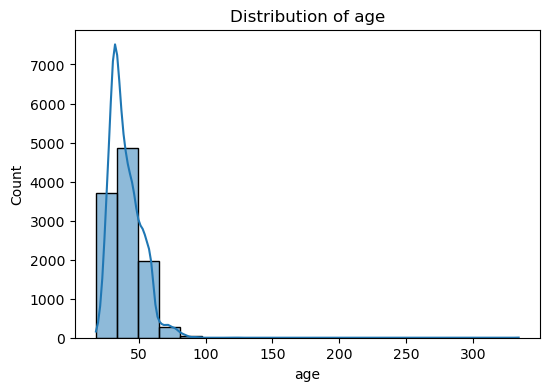

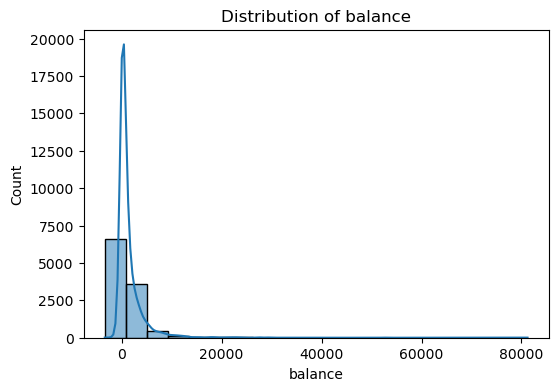

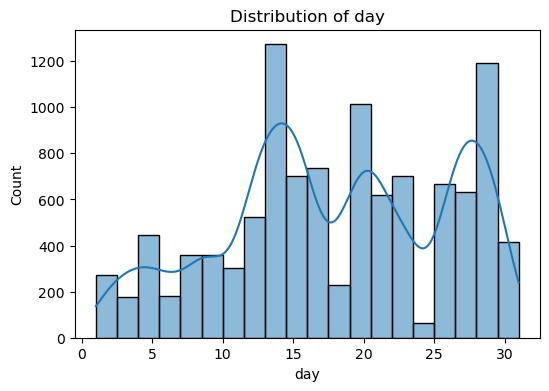

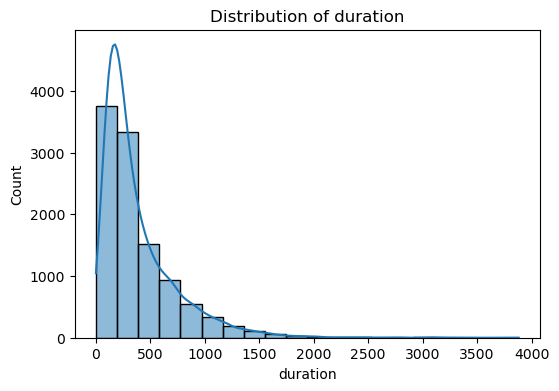

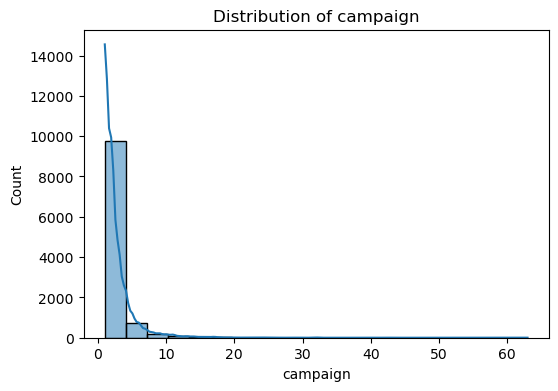

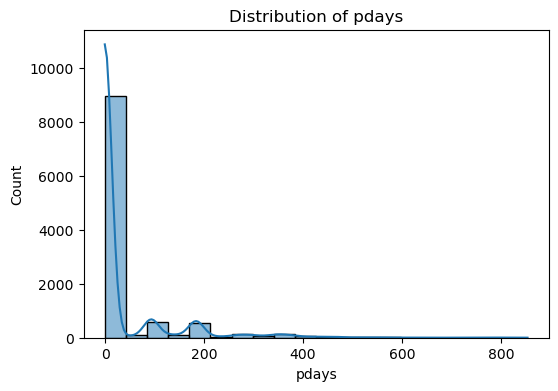

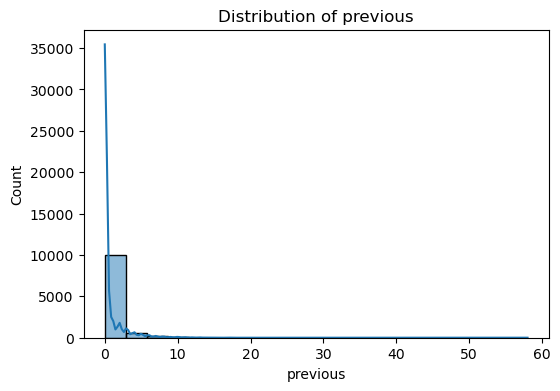

In [41]:
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.show()

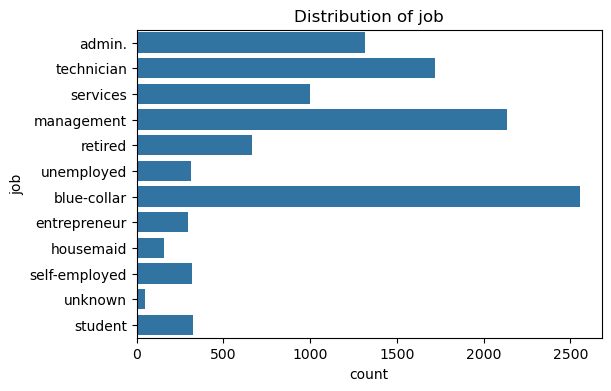

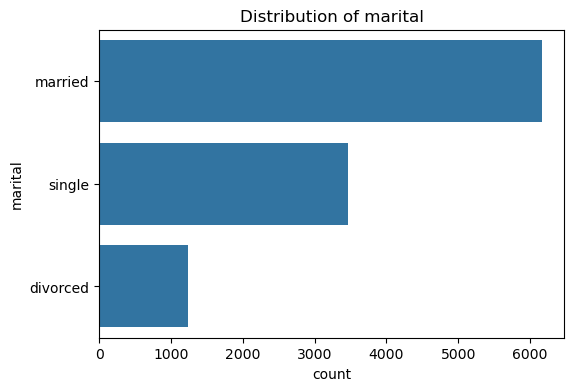

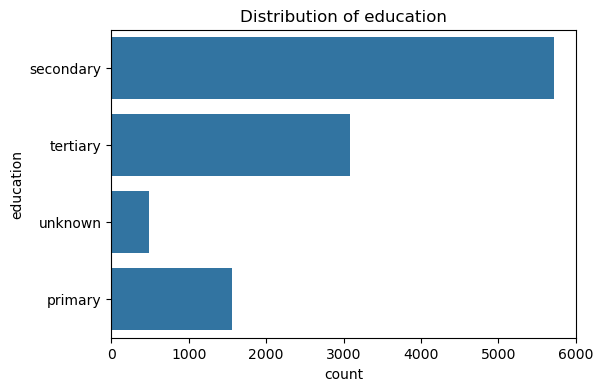

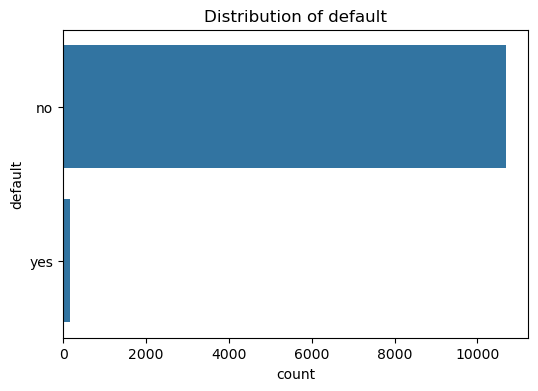

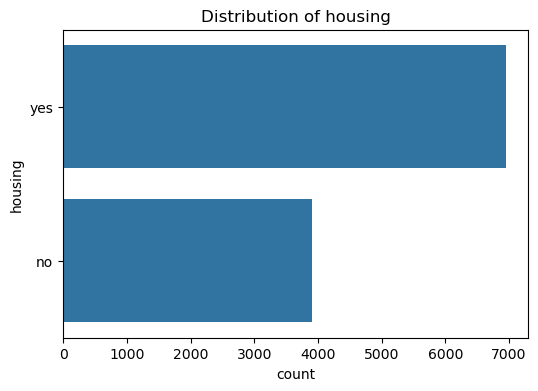

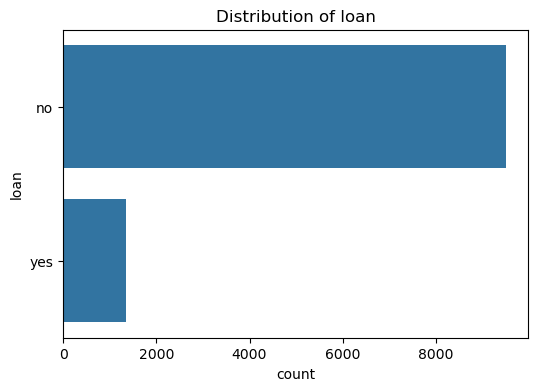

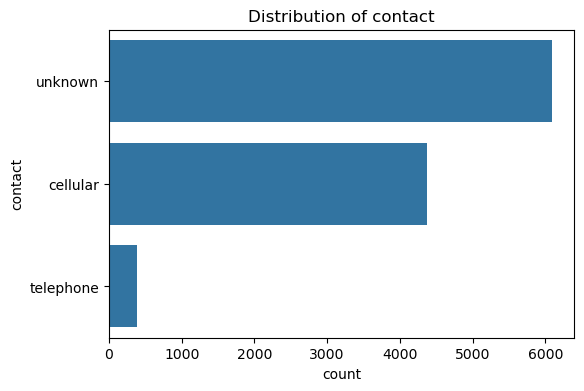

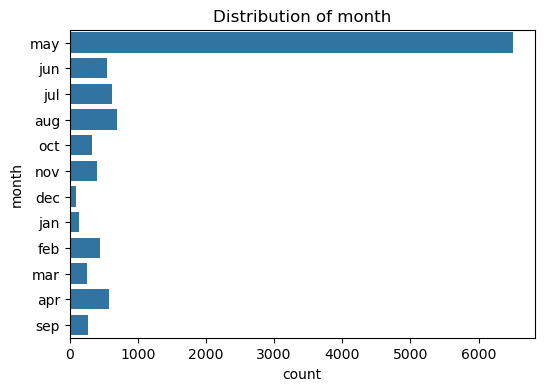

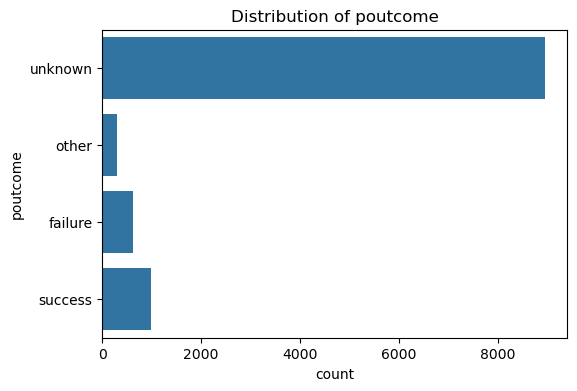

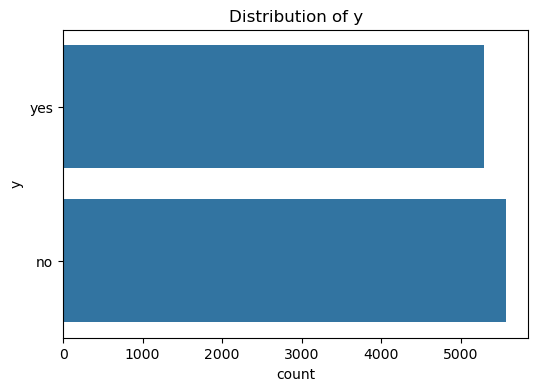

In [42]:
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(y=data[col])
    plt.title(f'Distribution of {col}')
    plt.show()

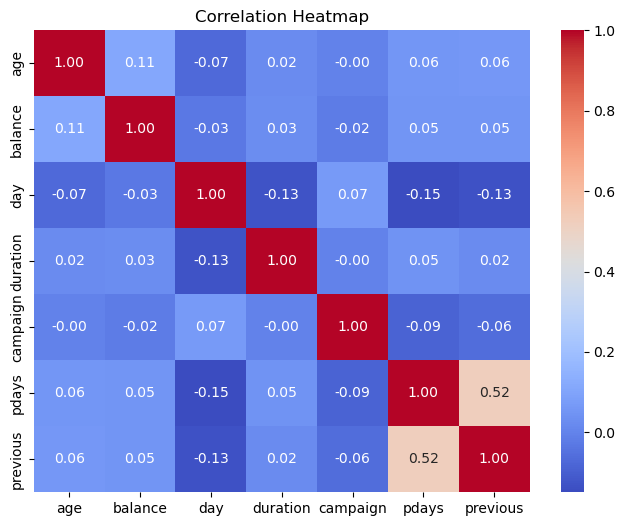

In [43]:
correlation_matrix = data[numerical_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


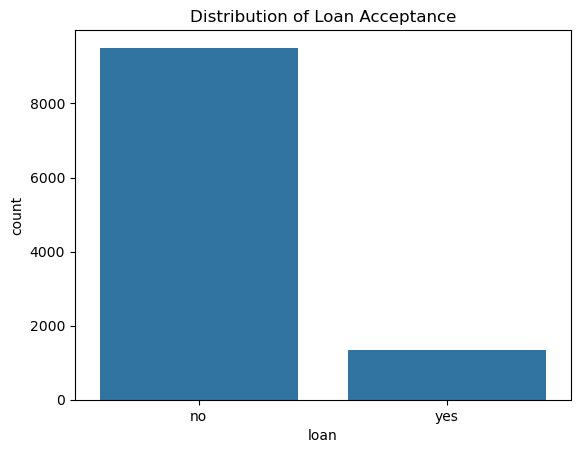

In [45]:
sns.countplot(x='loan', data=data)
plt.title('Distribution of Loan Acceptance')
plt.show()

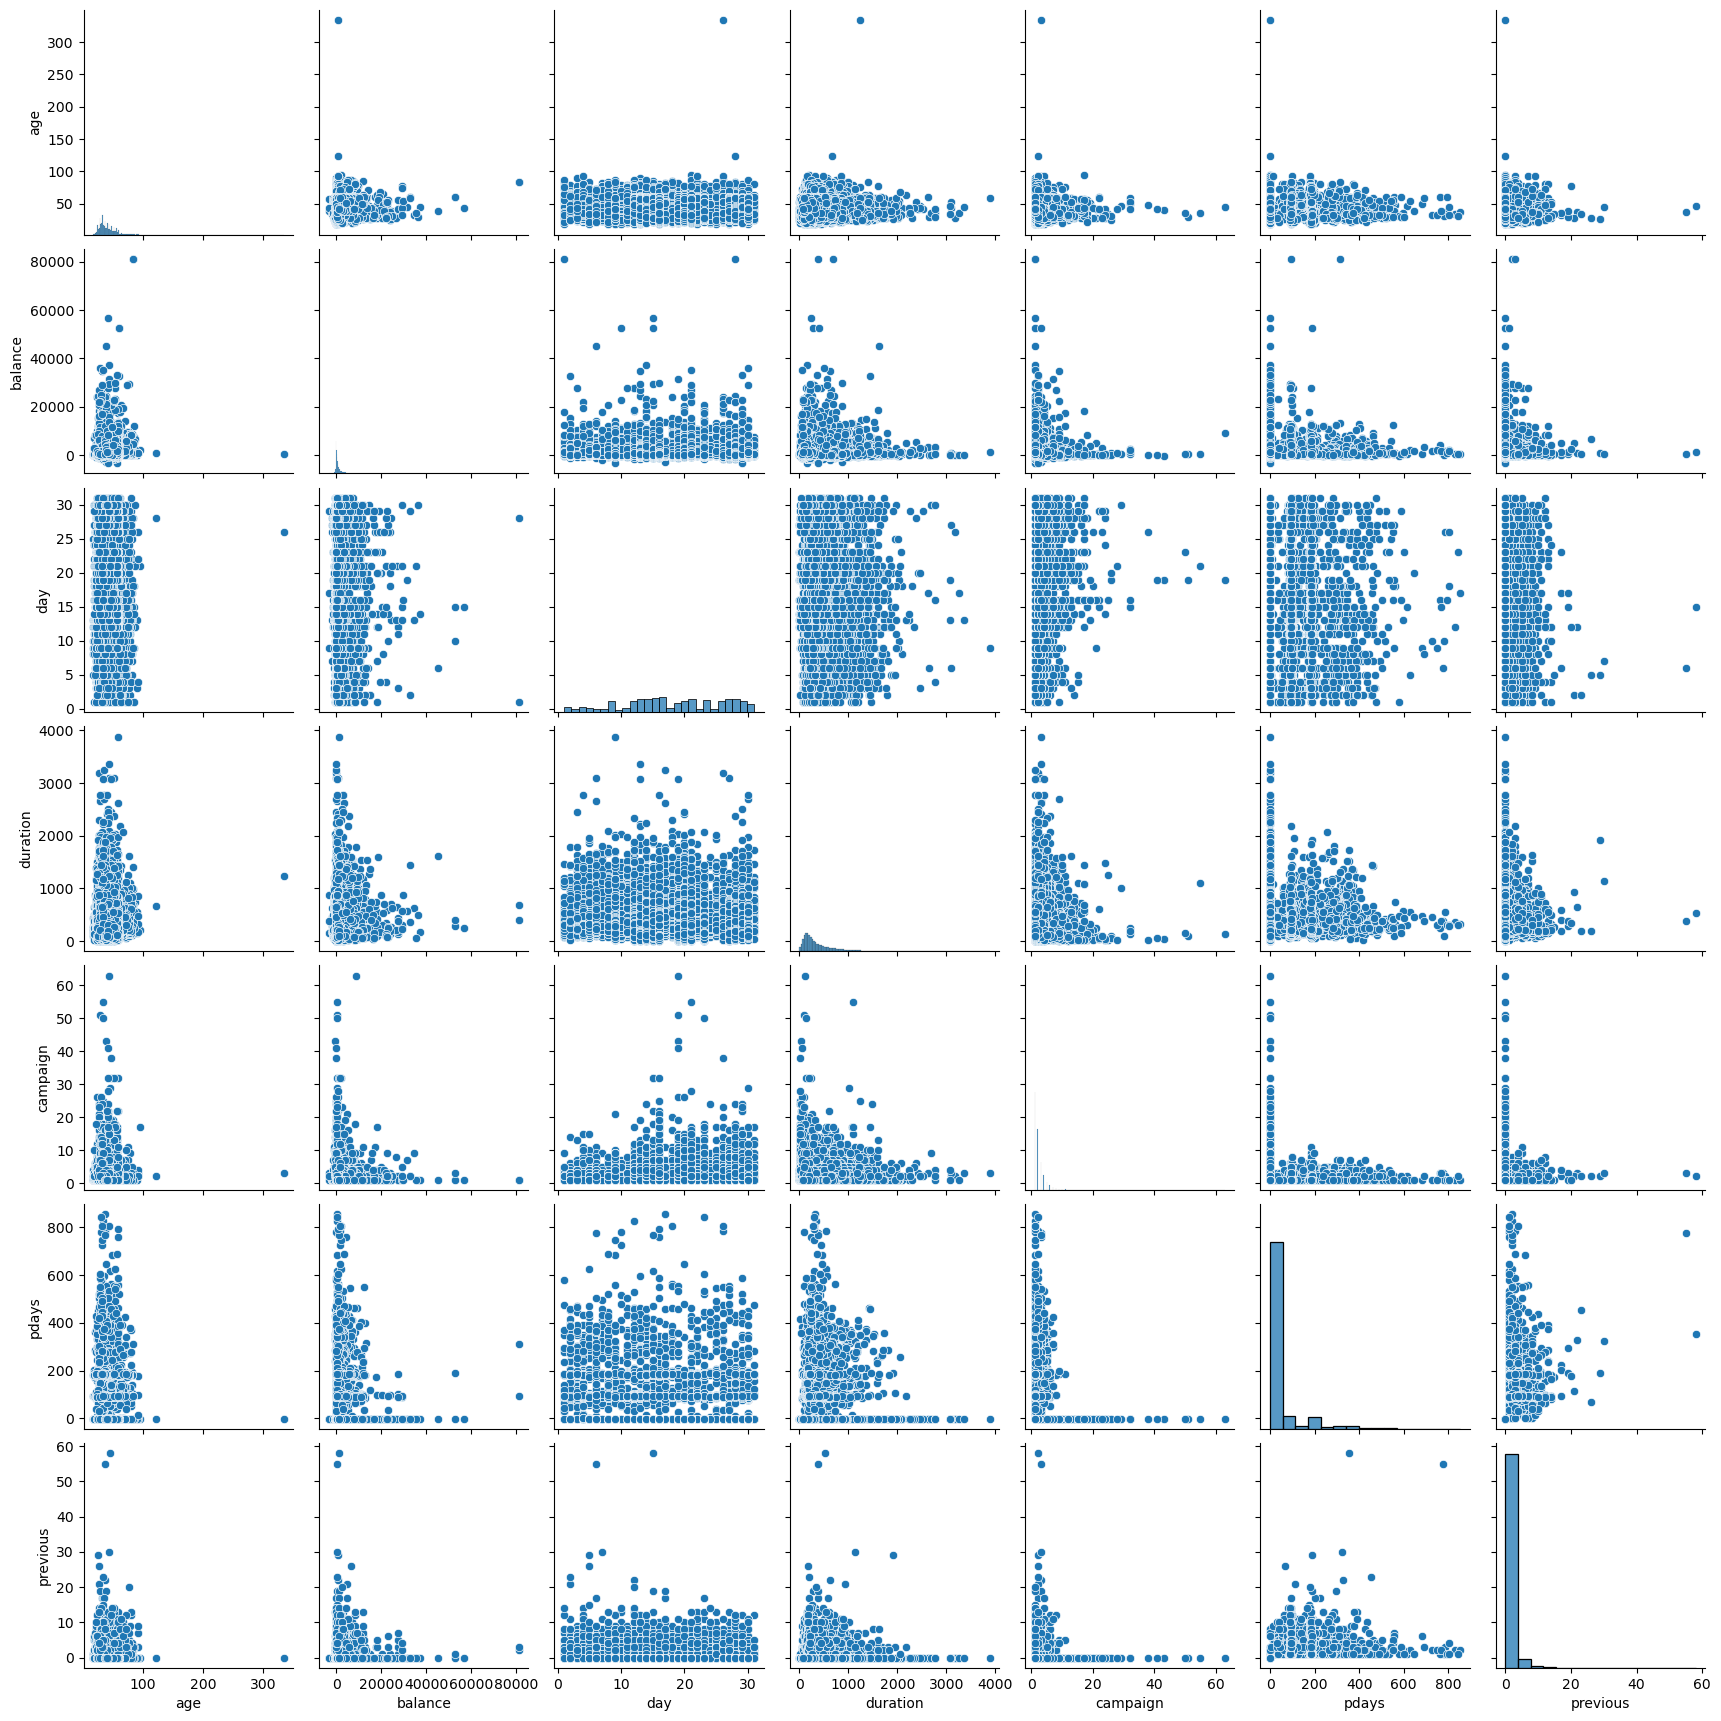

In [46]:
sns.pairplot(data[numerical_cols])
plt.show()

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [56]:
data = pd.read_csv('bank.csv')
print(data.head())


   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no   2343.0     yes   no  unknown   
1   56      admin.  married  secondary      no     45.0      no   no  unknown   
2   41  technician  married  secondary      no   1270.0     yes   no  unknown   
3   55    services  married  secondary      no   2476.0     yes   no  unknown   
4   54      admin.  married   tertiary      no    184.0      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome    y  
0  5.0   may    1042.0         1   -1.0         0  unknown  yes  
1  5.0   may    1467.0         1   -1.0         0  unknown  yes  
2  5.0   may    1389.0         1   -1.0         0  unknown  yes  
3  5.0   may     579.0         1   -1.0         0  unknown  yes  
4  5.0   may     673.0         2   -1.0         0  unknown  yes  


In [62]:
print(data['loan'].isnull().sum())


0


In [115]:
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    data[col] = data[col].fillna(data[col].mode()[0])


In [116]:

for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

In [117]:
X = data.drop('loan', axis=1)  
y = data['loan']


In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [119]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test) 

In [68]:
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


In [69]:
X = data.drop('loan', axis=1)  
y = data['loan'] 


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [120]:
print(f"Shape of X_train_scaled: {X_train_scaled.shape}")
print(f"Shape of X_test_scaled: {X_test_scaled.shape}")

Shape of X_train_scaled: (8688, 16)
Shape of X_test_scaled: (2173, 16)


In [123]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [124]:
data = pd.read_csv('bank.csv') 

In [125]:
data.fillna(data.median(), inplace=True) 
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    data[col] = data[col].fillna(data[col].mode()[0])  

TypeError: Cannot convert [['admin.' 'admin.' 'technician' ... 'management' 'blue-collar' 'admin.']
 ['married' 'married' 'married' ... 'married' 'married' 'single']
 ['secondary' 'secondary' 'secondary' ... 'tertiary' 'secondary'
  'tertiary']
 ...
 ['may' 'may' 'may' ... 'may' 'may' 'may']
 ['unknown' 'unknown' 'unknown' ... 'unknown' 'unknown' 'unknown']
 ['yes' 'yes' 'yes' ... 'no' 'no' 'no']] to numeric